In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('McDonald_s_Reviews.csv',encoding = 'latin1')

In [3]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [4]:
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(33396, 10)

In [7]:
def label_rating(rating_val):
        rating = int(rating_val[0])

        if rating <= 2:
            return 'poor'
        elif rating == 3:
              return 'average'
        else:
              return 'excellent'
        
df['label'] = df['rating'].apply(label_rating)

In [8]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating',
       'label'],
      dtype='object')

In [9]:
df.drop(columns = ['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time','rating'],inplace=True)

In [10]:
df.head()

,review,label
0,Why does it look like someone spit on my food?...,poor
1,It'd McDonalds. It is what it is as far as the...,excellent
2,Made a mobile order got to the speaker and che...,poor
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,excellent
4,"I repeat my order 3 times in the drive thru, a...",poor


-----

In [11]:
# Lowercase

df['review'] = df['review'].apply(lambda x : x.lower() if isinstance(x,str) else x)

In [12]:

import re

emoji_sentiment_dict = {
    "😡": "angry", "😤": "frustrated", "😒": "annoyed", "😠": "furious", "👎": "bad",
    "❤️": "love", "😍": "love", "😋": "delicious", "🍔": "burger", "🍟": "fries", "🔥": "hot", 
    "💯": "perfect", "👍": "good", "😢": "sad", "😐": "meh", "😂": "funny"
}

def map_emojis(text):
    if isinstance(text, str):
        for emoji, meaning in emoji_sentiment_dict.items():
            text = text.replace(emoji, f" {meaning} ")
    return text

df['review'] = df['review'].apply(map_emojis)


In [13]:
# Removing Special Characters
import re

def remove_special(text):
    return re.sub(r'[^a-zA-Z\s]','',text)

df['review'] = df['review'].apply(remove_special)

In [14]:
# Removing Stopwords

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens) 



df['review'] = df['review'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

lemmatizer = WordNetLemmatizer()

def advanced_lemmatize(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        lemmatized_words = [
            lemmatizer.lemmatize(word, get_wordnet_pos(pos))
            for word, pos in pos_tags
        ]
        return ' '.join(lemmatized_words)
    return ''



df['review'] = df['review'].apply(advanced_lemmatize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label_encode'] = le.fit_transform(df['label'])

In [17]:
df.drop(columns=['label'], inplace=True)


In [18]:
df.head()

,review,label_encode
0,look like someone spit food normal transaction...,2
1,itd mcdonalds far food atmosphere go staff mak...,1
2,make mobile order get speaker check line move ...,2
3,mc crispy chicken sandwich customer service qu...,1
4,repeat order time drive thru still manage mess...,2


In [19]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label_encode'], test_size=0.20, random_state=42)

In [20]:
# TFIDF 

import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer()

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tf, y_train)


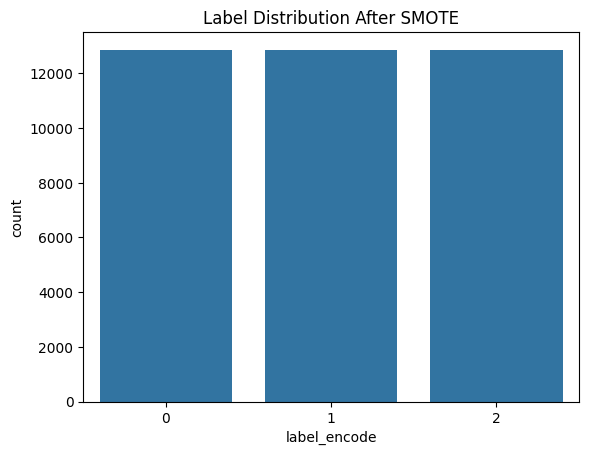

In [22]:
# Resample Ater SMOTE

sns.countplot(x=y_train_resampled)
plt.title("Label Distribution After SMOTE")
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

logistic_model = LogisticRegression(class_weight='balanced',random_state=42)

logistic_model.fit(X_train_tf,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [24]:
y_pred_log = logistic_model.predict(X_test_tf)
y_pred_log

array([0, 0, 0, ..., 2, 2, 1])

In [25]:
print("Accuracy Score",accuracy_score(y_test,y_pred_log))
print("Confusion Matrix",confusion_matrix(y_test,y_pred_log))
print("Classification_Report",classification_report(y_test,y_pred_log))

Accuracy Score 0.7887724550898204
Confusion Matrix [[ 573  178  188]
 [ 399 2583  216]
 [ 288  142 2113]]
Classification_Report               precision    recall  f1-score   support

           0       0.45      0.61      0.52       939
           1       0.89      0.81      0.85      3198
           2       0.84      0.83      0.84      2543

    accuracy                           0.79      6680
   macro avg       0.73      0.75      0.73      6680
weighted avg       0.81      0.79      0.80      6680



----

In [26]:
# Cross Validation

from sklearn.model_selection import cross_val_score

logistic_cv = cross_val_score(logistic_model, X_train_tf,y_train,cv=5, scoring='accuracy')

In [27]:
print('Logistic CV Score', logistic_cv)
print('Logistic CV Score Mean', logistic_cv.mean())

Logistic CV Score [0.78686377 0.7915029  0.7871982  0.79037994 0.78439079]
Logistic CV Score Mean 0.7880671209518078


In [28]:
# Hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'], 
    'max_iter': [100, 200]
}

grid_search_log = GridSearchCV(estimator = logistic_model, param_grid= param_grid, scoring='accuracy',n_jobs=-1,verbose=1)

grid_search_log.fit(X_train_tf,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [29]:
print('Best Parameter',grid_search_log.best_params_)
print('Best CV score',grid_search_log.best_score_)

Best Parameter {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score 0.8076061030661865


----


In [30]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train_tf,y_train)

MultinomialNB()

In [31]:

y_pred_nb = nb_model.predict(X_test_tf)

In [32]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({1: 12863, 2: 9974, 0: 3879})
After SMOTE: Counter({0: 12863, 1: 12863, 2: 12863})


In [33]:
print("Accuracy Score",accuracy_score(y_test,y_pred_nb))
print("Confusion Matrix",confusion_matrix(y_test,y_pred_nb))
print("Classification_Report",classification_report(y_test,y_pred_nb))

Accuracy Score 0.7991017964071856
Confusion Matrix [[ 188  421  330]
 [   0 2841  357]
 [   0  234 2309]]
Classification_Report               precision    recall  f1-score   support

           0       1.00      0.20      0.33       939
           1       0.81      0.89      0.85      3198
           2       0.77      0.91      0.83      2543

    accuracy                           0.80      6680
   macro avg       0.86      0.67      0.67      6680
weighted avg       0.82      0.80      0.77      6680



In [34]:
# Cross Validation Naive Bayes

from sklearn.model_selection import cross_val_score

cv_score_nb = cross_val_score(nb_model, X_train_tf,y_train, cv=5, scoring='accuracy')

print("Cross Validation Score",cv_score_nb)
print("Cross Validation Score Mean",cv_score_nb.mean())

Cross Validation Score [0.79696856 0.80572712 0.80217106 0.79842785 0.80067378]
Cross Validation Score Mean 0.8007936751426961


In [35]:
# Tuning for Naive Bayes

from sklearn.model_selection import GridSearchCV

nb_model = MultinomialNB()

param_grid2 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

grid_search_nb = GridSearchCV(estimator = nb_model, param_grid= param_grid2, scoring='accuracy',n_jobs=-1,verbose=1)


In [36]:
grid_search_nb.fit(X_train_tf,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='accuracy', verbose=1)

In [37]:
y_pred_grid = grid_search_nb.predict(X_test_tf)

In [38]:
print(accuracy_score(y_test,y_pred_grid))

0.8062874251497006


----

In [39]:
from sklearn.svm import SVC

svc_model = SVC(class_weight='balanced')

svc_model.fit(X_train_tf,y_train)

SVC(class_weight='balanced')

In [40]:
y_pred_svc = svc_model.predict(X_test_tf)

In [41]:
print("Accuracy Score",accuracy_score(y_test,y_pred_svc))
print("Confusion Matrix",confusion_matrix(y_test,y_pred_svc))
print("Classification_Report",classification_report(y_test,y_pred_svc))

Accuracy Score 0.8215568862275449
Confusion Matrix [[ 527  206  206]
 [ 243 2726  229]
 [ 165  143 2235]]
Classification_Report               precision    recall  f1-score   support

           0       0.56      0.56      0.56       939
           1       0.89      0.85      0.87      3198
           2       0.84      0.88      0.86      2543

    accuracy                           0.82      6680
   macro avg       0.76      0.76      0.76      6680
weighted avg       0.82      0.82      0.82      6680



In [42]:
# Cross Validation SVC

from sklearn.model_selection import cross_val_score

cv_score_svc = cross_val_score(svc_model, X_train_tf,y_train,cv = 5, scoring='accuracy', n_jobs=-1)

In [43]:
print("Cross Validation Score SVC", cv_score_svc)
print("Cross Validation Score SVC mean", cv_score_svc.mean())

Cross Validation Score SVC [0.82017216 0.83211679 0.8158338  0.82238443 0.82275875]
Cross Validation Score SVC mean 0.8226531846469889


In [44]:
import pickle

with open ('svc_model.pkl','wb') as model_file:
    pickle.dump(svc_model,model_file)

with open ('tfidf_vectorizer.pkl','wb') as vec_file:
    pickle.dump(tf_vectorizer,vec_file)